In [1]:
# Para utilizar recursos do sistema
import os
import sys

# Bibliotecas DASK
import dask
from dask.distributed import Client
import dask.dataframe as dd # similar ao pandas
import dask.multiprocessing

# Para criar DF vazio
import pandas as pd

# Para plot
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
## Observando a versão do Dask
!pip show dask

Name: dask
Version: 2022.2.1
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: 
Author-email: 
License: BSD
Location: c:\users\andre\anaconda3\lib\site-packages
Requires: cloudpickle, fsspec, packaging, partd, pyyaml, toolz
Required-by: datashader, distributed, intake


In [3]:
## Definindo caminho para as bases
path = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK"
print(path)

C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK


In [4]:
print('Executável:')
print(sys.executable)

print('\nVersão do Python:')
print(sys.version)

Executável:
C:\Users\andre\anaconda3\python.exe

Versão do Python:
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [5]:
set_up1 = '4 workers, 1 thread por worker, 1GB limite de memória'
set_up2 = '6 workers, 1 thread por worker, 2GB limite de memória'

In [6]:
## Definindo os clusters
client = Client(n_workers=6, threads_per_worker=1, memory_limit='2GB')

In [7]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 6,Total memory: 11.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:65010,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 6
Started: Just now,Total memory: 11.18 GiB
Comm: tcp://127.0.0.1:65039,Total threads: 1
Dashboard: http://127.0.0.1:65040/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:65014,


In [8]:
## Lista com os arquivos na pasta de importação
files = os.listdir(path)
files

['avon-and-somerset-outcomes.csv',
 'avon-and-somerset-stop-and-search.csv',
 'avon-and-somerset-street.csv',
 'bedfordshire-outcomes.csv',
 'bedfordshire-stop-and-search.csv',
 'bedfordshire-street.csv',
 'btp-stop-and-search.csv',
 'btp-street.csv',
 'cambridgeshire-outcomes.csv',
 'cambridgeshire-stop-and-search.csv',
 'cambridgeshire-street.csv',
 'cheshire-outcomes.csv',
 'cheshire-stop-and-search.csv',
 'cheshire-street.csv',
 'city-of-london-outcomes.csv',
 'city-of-london-stop-and-search.csv',
 'city-of-london-street.csv',
 'cleveland-outcomes.csv',
 'cleveland-stop-and-search.csv',
 'cleveland-street.csv',
 'cumbria-outcomes.csv',
 'cumbria-stop-and-search.csv',
 'cumbria-street.csv',
 'derbyshire-outcomes.csv',
 'derbyshire-stop-and-search.csv',
 'derbyshire-street.csv',
 'devon-and-cornwall-outcomes.csv',
 'devon-and-cornwall-stop-and-search.csv',
 'devon-and-cornwall-street.csv',
 'dorset-outcomes.csv',
 'dorset-stop-and-search.csv',
 'dorset-street.csv',
 'durham-outcomes.

In [9]:
path_outcomes = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK\Outcomes"
path_street = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK\Street"
path_stse = r"C:\Users\andre\Desktop\FACULDADE\2022.2 ÚLTIMO\BIgData\Projeto\Crimes in UK\StopAndSearch"

In [10]:
files_out = os.listdir(path_outcomes)
files_out

['avon-and-somerset-outcomes.csv',
 'bedfordshire-outcomes.csv',
 'cambridgeshire-outcomes.csv',
 'cheshire-outcomes.csv',
 'city-of-london-outcomes.csv',
 'cleveland-outcomes.csv',
 'cumbria-outcomes.csv',
 'derbyshire-outcomes.csv',
 'devon-and-cornwall-outcomes.csv',
 'dorset-outcomes.csv',
 'durham-outcomes.csv',
 'dyfed-powys-outcomes.csv',
 'essex-outcomes.csv',
 'gloucestershire-outcomes.csv',
 'greater-manchester-outcomes.csv',
 'gwent-outcomes.csv',
 'hampshire-outcomes.csv',
 'hertfordshire-outcomes.csv',
 'humberside-outcomes.csv',
 'kent-outcomes.csv',
 'lancashire-outcomes.csv',
 'leicestershire-outcomes.csv',
 'merseyside-outcomes.csv',
 'metropolitan-outcomes.csv',
 'norfolk-outcomes.csv',
 'north-wales-outcomes.csv',
 'north-yorkshire-outcomes.csv',
 'northamptonshire-outcomes.csv',
 'northumbria-outcomes.csv',
 'nottinghamshire-outcomes.csv',
 'south-wales-outcomes.csv',
 'south-yorkshire-outcomes.csv',
 'staffordshire-outcomes.csv',
 'suffolk-outcomes.csv',
 'surrey-o

In [11]:
avon_and_somerset_outcomes = []
bedfordshire_outcomes = []
cambridgeshire_outcomes = []
cheshire_outcomes = []
city_of_london_outcomes = []
cleveland_outcomes = []
cumbria_outcomes = []
derbyshire_outcomes = []
devon_and_cornwall_outcomes = []
dorset_outcomes = []
durham_outcomes = []
dyfed_powys_outcomes = []
essex_outcomes = []
gloucestershire_outcomes = []
greater_manchester_outcomes = []
gwent_outcomes = []
hampshire_outcomes = []
hertfordshire_outcomes = []
humberside_outcomes = []
kent_outcomes = []
lancashire_outcomes = []
leicestershire_outcomes = []
merseyside_outcomes = []
metropolitan_outcomes = []
norfolk_outcomes = []
north_wales_outcomes = []
north_yorkshire_outcomes = []
northamptonshire_outcomes = []
northumbria_outcomes = []
nottinghamshire_outcomes = []
south_wales_outcomes = []
south_yorkshire_outcomes = []
staffordshire_outcomes = []
suffolk_outcomes = []
surrey_outcomes = []
sussex_outcomes = []
thames_valley_outcomes = []
warwickshire_outcomes = []
west_mercia_outcomes = []
west_midlands_outcomes = []
west_yorkshire_outcomes = []
wiltshire_outcomes = []

In [12]:
nome_dfs = [avon_and_somerset_outcomes,
            bedfordshire_outcomes,
            cambridgeshire_outcomes,
            cheshire_outcomes,
            city_of_london_outcomes,
            cleveland_outcomes,
            cumbria_outcomes,
            derbyshire_outcomes,
            devon_and_cornwall_outcomes,
            dorset_outcomes,
            durham_outcomes,
            dyfed_powys_outcomes,
            essex_outcomes,
            gloucestershire_outcomes,
            greater_manchester_outcomes,
            gwent_outcomes,
            hampshire_outcomes,
            hertfordshire_outcomes,
            humberside_outcomes,
            kent_outcomes,
            lancashire_outcomes,
            leicestershire_outcomes,
            merseyside_outcomes,
            metropolitan_outcomes,
            norfolk_outcomes,
            north_wales_outcomes,
            north_yorkshire_outcomes,
            northamptonshire_outcomes,
            northumbria_outcomes,
            nottinghamshire_outcomes,
            south_wales_outcomes,
            south_yorkshire_outcomes,
            staffordshire_outcomes,
            suffolk_outcomes,
            surrey_outcomes,
            sussex_outcomes,
            thames_valley_outcomes,
            warwickshire_outcomes,
            west_mercia_outcomes,
            west_midlands_outcomes,
            west_yorkshire_outcomes,
            wiltshire_outcomes]

In [13]:
nome_cidades = ['avon and somerset',
            'bedfordshire',
            'cambridgeshire',
            'cheshire',
            'city of london',
            'cleveland',
            'cumbria',
            'derbyshire',
            'devon and cornwall',
            'dorset',
            'durham',
            'dyfed powys',
            'essex',
            'gloucestershire',
            'greater manchester',
            'gwent',
            'hampshire',
            'hertfordshire',
            'humberside',
            'kent',
            'lancashire',
            'leicestershire',
            'merseyside',
            'metropolitan',
            'norfolk',
            'north wales',
            'north yorkshire',
            'northamptonshire',
            'northumbria',
            'nottinghamshire',
            'south wales',
            'south yorkshire',
            'staffordshire',
            'suffolk',
            'surrey',
            'sussex',
            'thames valley',
            'warwickshire',
            'west mercia',
            'west midlands',
            'west yorkshire',
            'wiltshire']

In [14]:
%%time 
## Medindo o tempo para rodar a célula.
outcomes = pd.DataFrame()
## Lista vazia para retornar dfs com infos
## loop com as listas criadas, para cada arquivo na pasta será rodado o for, que importará o
## arquivo e colocará o nome da cidade em uma nova coluna, posteriormente os arquivos serão
## empilhados para facilitar o trabalho da dupla
for file,df,city in zip(files_out,nome_dfs,nome_cidades):
    ## Leitura do arquivo excel
    df = dd.read_csv(os.path.join(path_outcomes,file),
                     dtype={'LSOA code': 'object',
                            'LSOA name': 'object',
                            'Longitude': 'object',
                            'Latitude': 'object'})
    ## criando coluna 'cidade" e incluindo a cidade correspondente
    df['cidade'] = city
    ## Adicionando DF na lista
    outcomes = dd.concat([outcomes, df], ignore_index = True)


CPU times: total: 281 ms
Wall time: 2.35 s


In [15]:
outcomes.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,cidade
108759,410f31e49c5fa09d99f8256e31f37e99fb7d9187afc5f1...,2022-02,Wiltshire Police,Wiltshire Police,-1.740986,51.563574,On or near TYNEHAM ROAD,E01015486,Swindon 013F,Unable to prosecute suspect,wiltshire
108760,6f86bfbe8ae1d6cb29c9f2563e68a6331797b3e268a183...,2022-02,Wiltshire Police,Wiltshire Police,-1.763702,51.581371,On or near CONSTABLE ROAD,E01015560,Swindon 005F,Unable to prosecute suspect,wiltshire
108761,7306f17140e540daeff994a69739e429685229825d98bc...,2022-02,Wiltshire Police,Wiltshire Police,-2.132944,51.339858,On or near Parking Area,E01032077,Wiltshire 030A,Suspect charged,wiltshire
108762,cc2eab0e23d8665e36a52f728fc59980b3e70dd2252e96...,2022-02,Wiltshire Police,Wiltshire Police,-1.995054,51.351524,On or near ST JOHN'S STREET,E01031854,Wiltshire 026B,Suspect charged,wiltshire
108763,9a675d682b8144177ae81d86d697cacdce62d31b96a971...,2022-02,Wiltshire Police,Wiltshire Police,-1.989224,51.352782,On or near Supermarket,E01031850,Wiltshire 025A,Suspect charged,wiltshire


In [16]:
%%time
ocor_cidades = outcomes.cidade.value_counts().compute()
ocor_cidades

CPU times: total: 33.1 s
Wall time: 4min 15s


metropolitan          1765886
west yorkshire         796932
west midlands          623318
kent                   524401
essex                  468086
thames valley          467599
hampshire              445613
merseyside             428343
south yorkshire        399509
lancashire             394395
sussex                 330655
humberside             308571
south wales            300772
nottinghamshire        287622
northumbria            280889
leicestershire         263198
west mercia            236757
staffordshire          236063
devon and cornwall     235954
derbyshire             235029
avon and somerset      234022
cheshire               232995
hertfordshire          229197
surrey                 211549
dorset                 209416
cleveland              203595
cambridgeshire         191751
norfolk                190226
northamptonshire       179889
north yorkshire        175916
durham                 174577
north wales            156537
suffolk                153633
bedfordshi

In [17]:
print(f'Tempo no set up 1 ({set_up1}), foi de 9min 36s')
print(f'Tempo no set up 2 ({set_up2}), foi 5min 5s')

Tempo no set up 1 (4 workers, 1 thread por worker, 1GB limite de memória), foi de 9min 36s
Tempo no set up 2 (6 workers, 1 thread por worker, 2GB limite de memória), foi 5min 5s


In [18]:
outcomes = outcomes.drop(['Longitude','Latitude','LSOA code', 'LSOA name'], axis=1)

In [19]:
outcomes.tail()

,Crime ID,Month,Reported by,Falls within,Location,Outcome type,cidade
108759,410f31e49c5fa09d99f8256e31f37e99fb7d9187afc5f1...,2022-02,Wiltshire Police,Wiltshire Police,On or near TYNEHAM ROAD,Unable to prosecute suspect,wiltshire
108760,6f86bfbe8ae1d6cb29c9f2563e68a6331797b3e268a183...,2022-02,Wiltshire Police,Wiltshire Police,On or near CONSTABLE ROAD,Unable to prosecute suspect,wiltshire
108761,7306f17140e540daeff994a69739e429685229825d98bc...,2022-02,Wiltshire Police,Wiltshire Police,On or near Parking Area,Suspect charged,wiltshire
108762,cc2eab0e23d8665e36a52f728fc59980b3e70dd2252e96...,2022-02,Wiltshire Police,Wiltshire Police,On or near ST JOHN'S STREET,Suspect charged,wiltshire
108763,9a675d682b8144177ae81d86d697cacdce62d31b96a971...,2022-02,Wiltshire Police,Wiltshire Police,On or near Supermarket,Suspect charged,wiltshire


In [20]:
outcomes = outcomes.rename(columns = {'Crime ID':'ID','Reported by':'reported_by',
                                      'Falls within':'falls_within',
                                      'Outome type':'outcome'
                                     })


In [74]:
%time
meses = outcomes.Month.value_counts().to_frame("Crimes").reset_index().compute()
meses

CPU times: total: 0 ns
Wall time: 0 ns


,index,Crimes
0,2020-03,475666
1,2020-04,461197
2,2020-11,420776
3,2021-07,394116
4,2022-01,393508
5,2020-10,384283
6,2020-09,382091
7,2021-01,371982
8,2021-06,362148
9,2020-07,359124


In [75]:
meses = meses.rename(columns={'index':'month'})
meses.head()

,month,Crimes
0,2020-03,475666
1,2020-04,461197
2,2020-11,420776
3,2021-07,394116
4,2022-01,393508


In [76]:
meses.month = pd.to_datetime(meses.month)
meses.head()

,month,Crimes
0,2020-03-01,475666
1,2020-04-01,461197
2,2020-11-01,420776
3,2021-07-01,394116
4,2022-01-01,393508


In [77]:
meses = meses.sort_values(by = ['month'])
meses.head()

,month,Crimes
35,2019-03-01,217216
34,2019-04-01,276886
31,2019-05-01,309374
30,2019-06-01,312643
28,2019-07-01,316785


In [83]:
meses1 = meses.reset_index()
meses1 = meses1.drop(['level_0', 'index'], axis = 1)
meses1.head()

,month,Crimes
0,2019-03-01,217216
1,2019-04-01,276886
2,2019-05-01,309374
3,2019-06-01,312643
4,2019-07-01,316785


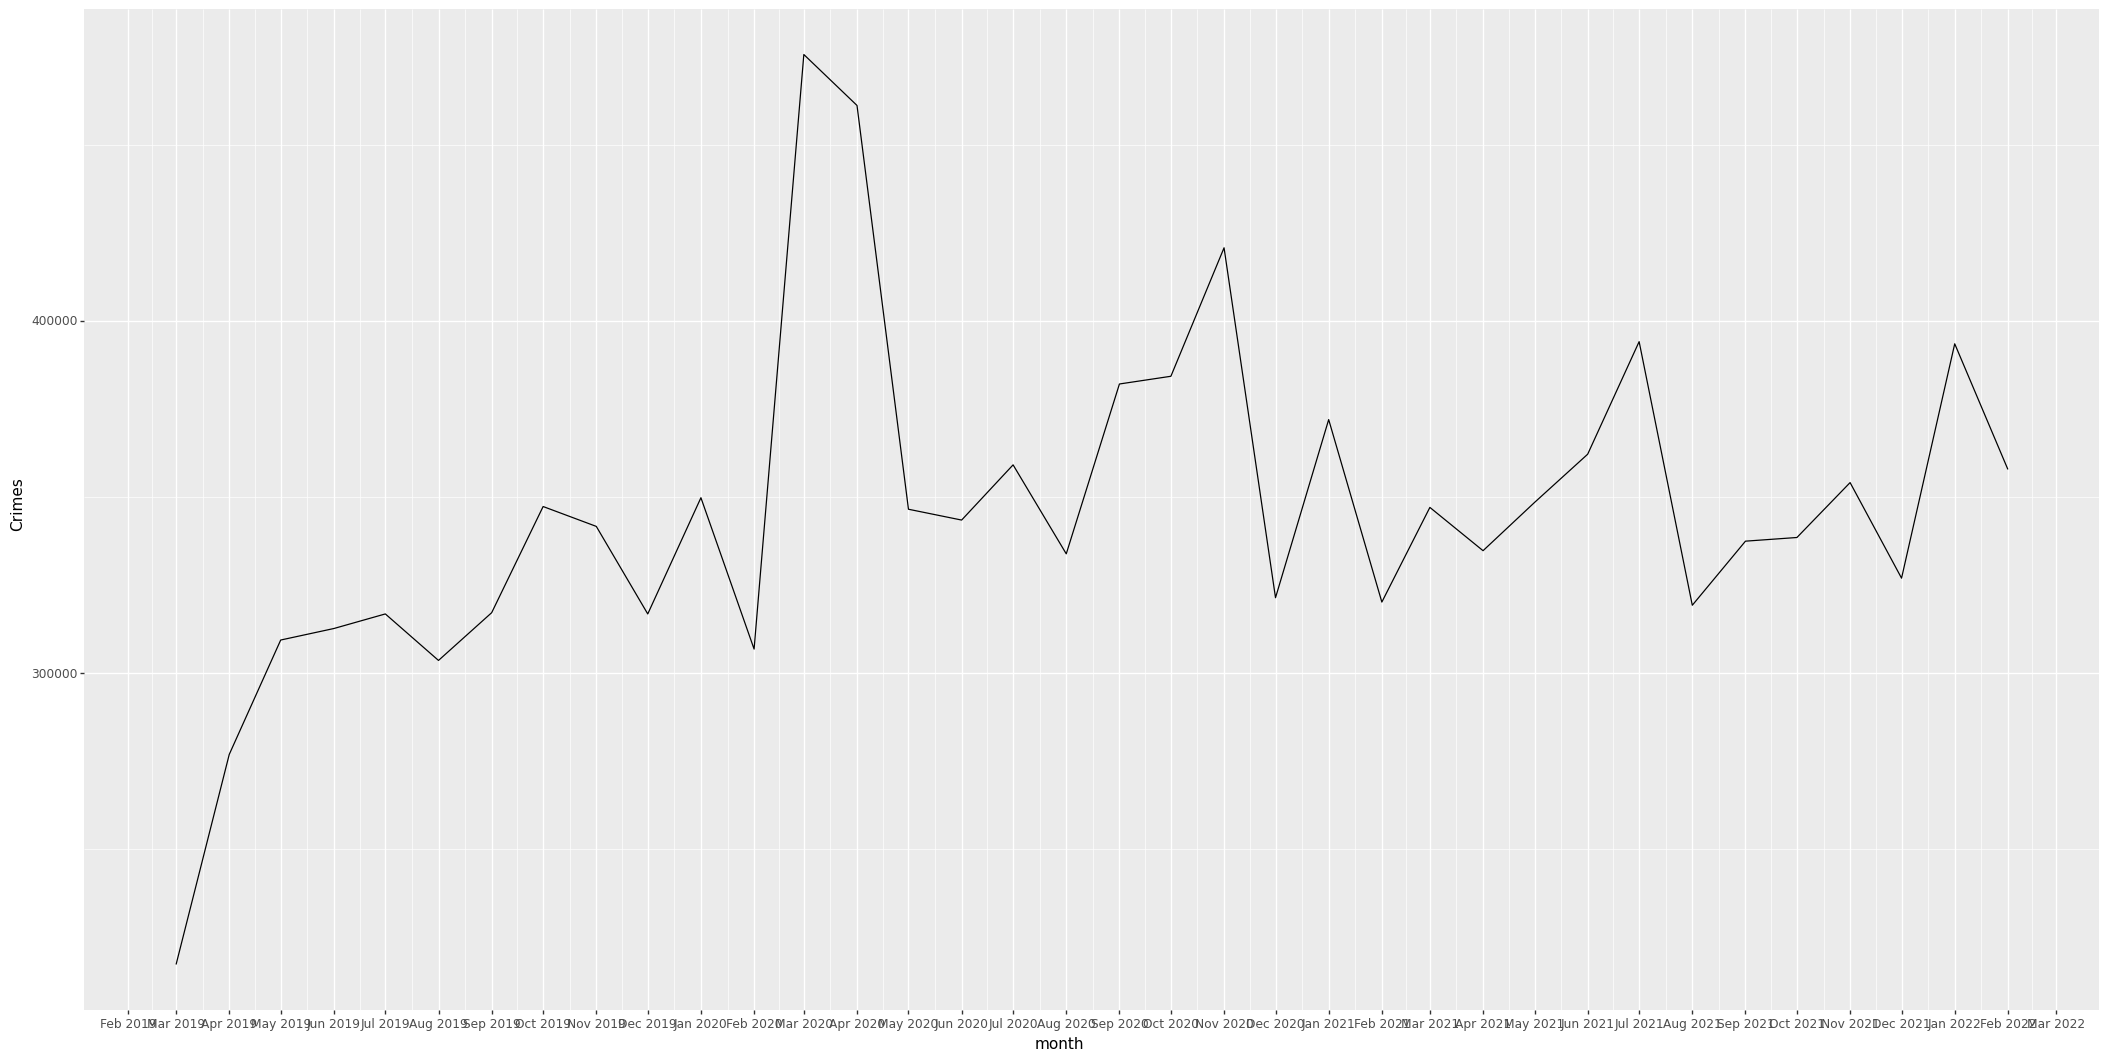

<ggplot: (145502839209)>

In [95]:
(ggplot(meses1, aes(x = "month", y = "Crimes")) +
     geom_line() +
     theme(figure_size=(26, 13)) +
     scale_x_date(date_breaks = "1 month", date_labels =  "%b %Y"))

### Meses com o maior resolução de crimes, seja resolução boa (predendo o criminoso) ou ruim (não encontrando o responsável)
* Março e Abril de 2020
* Setembro, Outubro e Novembro de 2020
* Junho e Julho de 2021
* Janeiro de 2022

Observando os meses dos gráficos com maior pico e o gráfico em si, não encontramos relação entre as resoluções dos crimes e os meses dos anos.

In [98]:
import numpy as np

In [181]:
outcomes_testes = outcomes.get_partition(2)

In [191]:
%time
outcomes_city = (outcomes.groupby(['cidade','Outcome type']).size()
                 .compute().to_frame('count').reset_index())

CPU times: total: 0 ns
Wall time: 0 ns


In [200]:
outcomes_city.loc[outcomes_city.cidade == 'wiltshire']

,cidade,Outcome type,count
921,wiltshire,Action to be taken by another organisation,2171
922,wiltshire,Court case unable to proceed,10
923,wiltshire,Defendant found not guilty,2
924,wiltshire,Defendant sent to Crown Court,1
925,wiltshire,Formal action is not in the public interest,364
926,wiltshire,Further investigation is not in the public int...,1107
927,wiltshire,Investigation complete; no suspect identified,41458
928,wiltshire,Local resolution,1111
929,wiltshire,Offender deprived of property,1
930,wiltshire,Offender fined,25


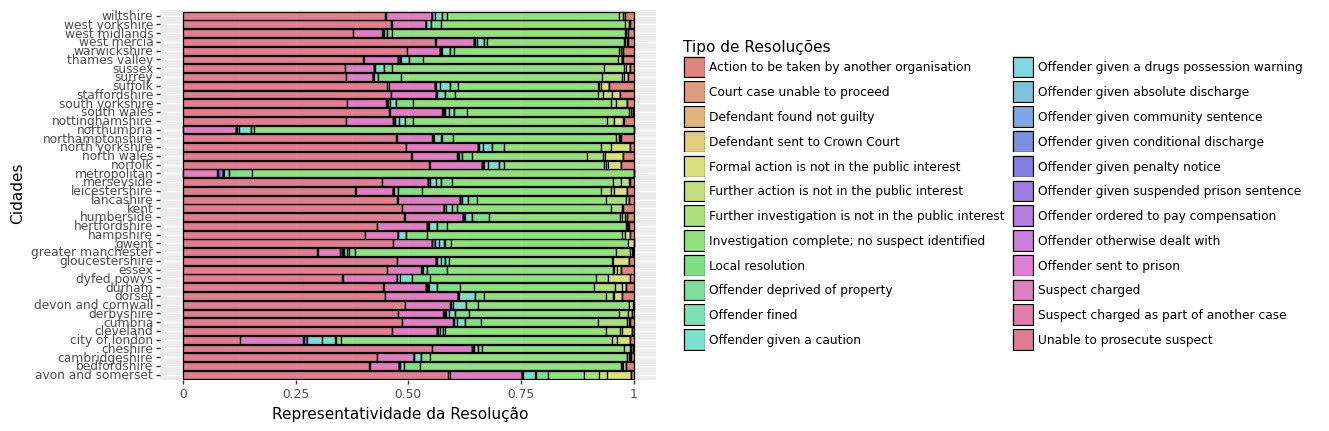

<ggplot: (145527019349)>

In [201]:
(ggplot(outcomes_city, aes(x = 'cidade', y = 'count', fill = 'Outcome type')) +
                       geom_col(color = 'black', position = 'fill', alpha = 0.75) +
                       labs(x = 'Cidades', y = 'Representatividade da Resolução', fill = 'Tipo de Resoluções') +
                       coord_flip())

O gráfico acima nos mostra uma predominânica de 2 tipos de reoluções onde as autoridades não foram capazes de processar o suspeito e investigação completa sem suspeito identificado. Isso mostrou ao grupo uma forte inpunidade e ineficiência da policia britânica nos últimos anos. A terceira resolução mais aparente no gráfico é suspeito acusado, mas ainda sim uma quantidade baixa de suspeitos acusados se levarmos em conta os crimes não resolvidos.

In [204]:
%%time
ocor_cidades = outcomes.falls_within.value_counts().compute()
ocor_cidades

CPU times: total: 37.4 s
Wall time: 4min 44s


Metropolitan Police Service       1765886
West Yorkshire Police              796932
West Midlands Police               623318
Kent Police                        524401
Essex Police                       468086
Thames Valley Police               467599
Hampshire Constabulary             445613
Merseyside Police                  428343
South Yorkshire Police             399509
Lancashire Constabulary            394395
Sussex Police                      330655
Humberside Police                  308571
South Wales Police                 300772
Nottinghamshire Police             287622
Northumbria Police                 280889
Leicestershire Police              263198
West Mercia Police                 236757
Staffordshire Police               236063
Devon & Cornwall Police            235954
Derbyshire Constabulary            235029
Avon and Somerset Constabulary     234022
Cheshire Constabulary              232995
Hertfordshire Constabulary         229197
Surrey Police                     

In [205]:
%%time
report = outcomes.reported_by.value_counts().compute()
report

CPU times: total: 34.8 s
Wall time: 4min 51s


Metropolitan Police Service       1765886
West Yorkshire Police              796932
West Midlands Police               623318
Kent Police                        524401
Essex Police                       468086
Thames Valley Police               467599
Hampshire Constabulary             445613
Merseyside Police                  428343
South Yorkshire Police             399509
Lancashire Constabulary            394395
Sussex Police                      330655
Humberside Police                  308571
South Wales Police                 300772
Nottinghamshire Police             287622
Northumbria Police                 280889
Leicestershire Police              263198
West Mercia Police                 236757
Staffordshire Police               236063
Devon & Cornwall Police            235954
Derbyshire Constabulary            235029
Avon and Somerset Constabulary     234022
Cheshire Constabulary              232995
Hertfordshire Constabulary         229197
Surrey Police                     

As colunas de quem reportou o crime e quem é o responsável por cuidar do crime são iguais então podemos usar apenas uma delas.

In [207]:
outcomes = outcomes.drop(['falls_within'], axis = 1)

In [208]:
%time
outcomes_repor = (outcomes.groupby(['reported_by','Outcome type']).size()
                 .compute().to_frame('count').reset_index())

CPU times: total: 0 ns
Wall time: 0 ns


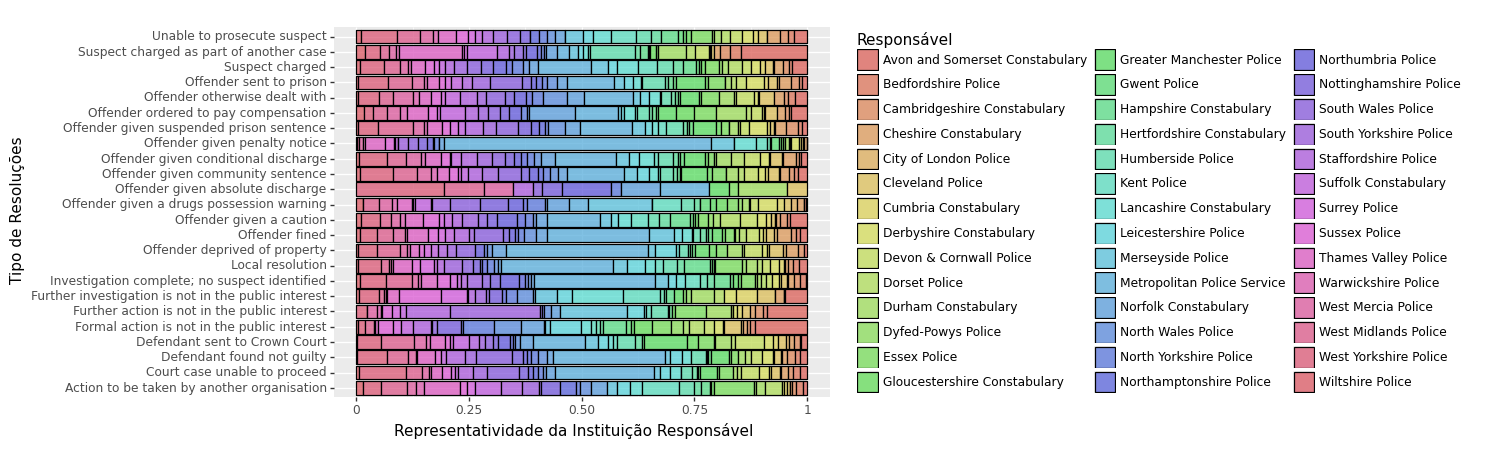

<ggplot: (145527858707)>

In [210]:
(ggplot(outcomes_repor, aes(x = 'Outcome type', y = 'count', fill = 'reported_by')) +
                       geom_col(color = 'black', position = 'fill', alpha = 0.75) +
                       labs(x = 'Tipo de Resoluções', y = 'Representatividade da Instituição Responsável',
                            fill = 'Responsável') +
                       coord_flip())

In [212]:
outcomes_repor

,reported_by,Outcome type,count
0,Avon and Somerset Constabulary,Action to be taken by another organisation,1375
1,Avon and Somerset Constabulary,Court case unable to proceed,21
2,Avon and Somerset Constabulary,Defendant found not guilty,16
3,Avon and Somerset Constabulary,Defendant sent to Crown Court,13
4,Avon and Somerset Constabulary,Formal action is not in the public interest,12336
...,...,...,...
938,Wiltshire Police,Offender otherwise dealt with,2
939,Wiltshire Police,Offender sent to prison,27
940,Wiltshire Police,Suspect charged,10982
941,Wiltshire Police,Suspect charged as part of another case,181


In [ ]:
%time
qntd_crimes = outcomes.groupby('reported_by').sum().compute().to_frame('total').reset_index()
qntd_crimes

In [ ]:
outcomes_repor = outcomes_repor.assign(
    percent = lambda _: _.count.sum()) ## tratando a data